In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Download

In [16]:
ipl_data = pd.read_csv("IPL_ball_by_ball_updated.csv")
Dhoni_data = ipl_data[(ipl_data['striker']=="MS Dhoni")]
CSK_data = ipl_data[(ipl_data['batting_team']=="Chennai Super Kings")]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
559,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
560,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,16.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,19.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,JDP Oram,...,0,NaN,NaN,NaN,NaN,NaN,caught,MS Dhoni,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207128,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,18.6,Chennai Super Kings,Delhi Capitals,MS Dhoni,MM Ali,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207130,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207131,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.3,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207132,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.4,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Season Wise Details of " CSK "

In [4]:
Season_runs = pd.DataFrame(CSK_data.groupby('season')["runs_off_bat"].sum())
Season_balls = pd.DataFrame(CSK_data.groupby('season')["ball"].count())
Season_SR = Season_runs.merge(Season_balls,on = "season").reset_index()
Season_SR['Strike_Rate'] = 100*(Season_SR['runs_off_bat']/Season_SR['ball'])
Total_match = CSK_data.groupby(["season","match_id"]).size().reset_index()
Total = pd.DataFrame(Total_match.groupby('season')['match_id'].count())
CSK_Season_details = Total.merge(Season_SR,on = 'season' , how='right')
CSK_Season_details.rename(columns = {'season':'Season', 'match_id':'Matches_CSK','runs_off_bat':'Runs_CSK','ball':'Balls_CSK','Strike_Rate':'SR_CSK'}, inplace = True)
CSK_Season_details

,Season,Matches_CSK,Runs_CSK,Balls_CSK,SR_CSK
0,2008,16,2365,1874,126.200640
1,2009,14,2084,1709,121.942657
2,2010,16,2442,1951,125.166581
3,2011,16,2461,1947,126.399589
4,2012,18,2717,2183,124.461750
5,2013,18,2671,2098,127.311725
6,2014,16,2519,1923,130.993240
7,2015,17,2564,2069,123.924601
8,2018,16,2698,1957,137.864078
9,2019,17,2346,2050,114.439024


# Season Wise Details of  " MS Dhoni "

In [5]:
Season_runs = pd.DataFrame(Dhoni_data.groupby('season')["runs_off_bat"].sum())
Season_balls = pd.DataFrame(Dhoni_data.groupby('season')["ball"].count())
Season_SR = Season_runs.merge(Season_balls,on = "season").reset_index()
Season_SR['Strike_Rate'] = 100*(Season_SR['runs_off_bat']/Season_SR['ball'])
Total_match = Dhoni_data.groupby(["season","match_id"]).size().reset_index()
Total = pd.DataFrame(Total_match.groupby('season')['match_id'].count())
MSD_Season_details = Total.merge(Season_SR,on = 'season' , how='right')
MSD_Season_details.rename(columns = {'season':'Season', 'match_id':'Matches_MSD','runs_off_bat':'Runs_MSD','ball':'Balls_MSD','Strike_Rate':'SR_MSD'}, inplace = True)
MSD_Season_details


,Season,Matches_MSD,Runs_MSD,Balls_MSD,SR_MSD
0,2008,14,414,319,129.780564
1,2009,13,332,270,122.962963
2,2010,11,287,215,133.488372
3,2011,13,392,247,158.704453
4,2012,17,358,283,126.501767
5,2013,16,461,298,154.697987
6,2014,15,371,258,143.798450
7,2015,17,372,309,120.388350
8,2016,12,284,220,129.090909
9,2017,15,290,261,111.111111


# Contribution of  " MSD "  for  " CSK "

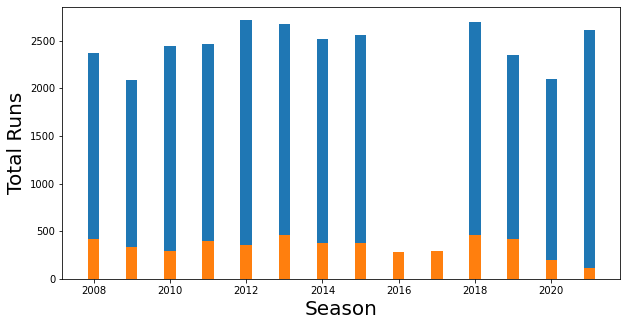

,Season,Matches_CSK,Matches_MSD,Runs_CSK,Runs_MSD,MSD_Runs_Contri,Balls_CSK,Balls_MSD,MSD_Balls_Contri,SR_CSK,SR_MSD,MSD_CSK_SR
0,2008,16.0,14,2365.0,414,17.505285,1874.0,319,17.022412,126.200640,129.780564,102.836692
1,2009,14.0,13,2084.0,332,15.930902,1709.0,270,15.798713,121.942657,122.962963,100.836710
2,2010,16.0,11,2442.0,287,11.752662,1951.0,215,11.019990,125.166581,133.488372,106.648572
3,2011,16.0,13,2461.0,392,15.928484,1947.0,247,12.686184,126.399589,158.704453,125.557729
4,2012,18.0,17,2717.0,358,13.176297,2183.0,283,12.963811,124.461750,126.501767,101.639071
5,2013,18.0,16,2671.0,461,17.259453,2098.0,298,14.204004,127.311725,154.697987,121.511185
6,2014,16.0,15,2519.0,371,14.728067,1923.0,258,13.416537,130.993240,143.798450,109.775474
7,2015,17.0,17,2564.0,372,14.508580,2069.0,309,14.934751,123.924601,120.388350,97.146449
8,2016,NaN,12,NaN,284,NaN,NaN,220,NaN,NaN,129.090909,NaN
9,2017,NaN,15,NaN,290,NaN,NaN,261,NaN,NaN,111.111111,NaN


In [11]:
Season_details = CSK_Season_details.merge(MSD_Season_details,on = 'Season' , how='right')
Season_details['MSD_Runs_Contri'] =(Season_details['Runs_MSD']*100)/Season_details['Runs_CSK']
Season_details['MSD_Balls_Contri'] =(Season_details['Balls_MSD']*100)/Season_details['Balls_CSK']
Season_details['MSD_CSK_SR'] =((Season_details['SR_MSD']*100)/Season_details['SR_CSK'])
Season_details = Season_details[['Season','Matches_CSK','Matches_MSD','Runs_CSK','Runs_MSD','MSD_Runs_Contri','Balls_CSK','Balls_MSD','MSD_Balls_Contri','SR_CSK','SR_MSD','MSD_CSK_SR']]

plt.figure(figsize=(10,5))
plt.bar(Season_details.Season,Season_details.Runs_CSK,width = 0.3)
plt.bar(Season_details.Season,Season_details.Runs_MSD,width = 0.3)
plt.title = (" MSD Run Contribution for CSK")
plt.xlabel('Season',fontsize=20)
plt.ylabel('Total Runs',fontsize=20)
plt.show()
Season_details

#Season_details.Runs_CSK.sum()

# Bowler wise Full IPL Details for   " MS Dhoni "

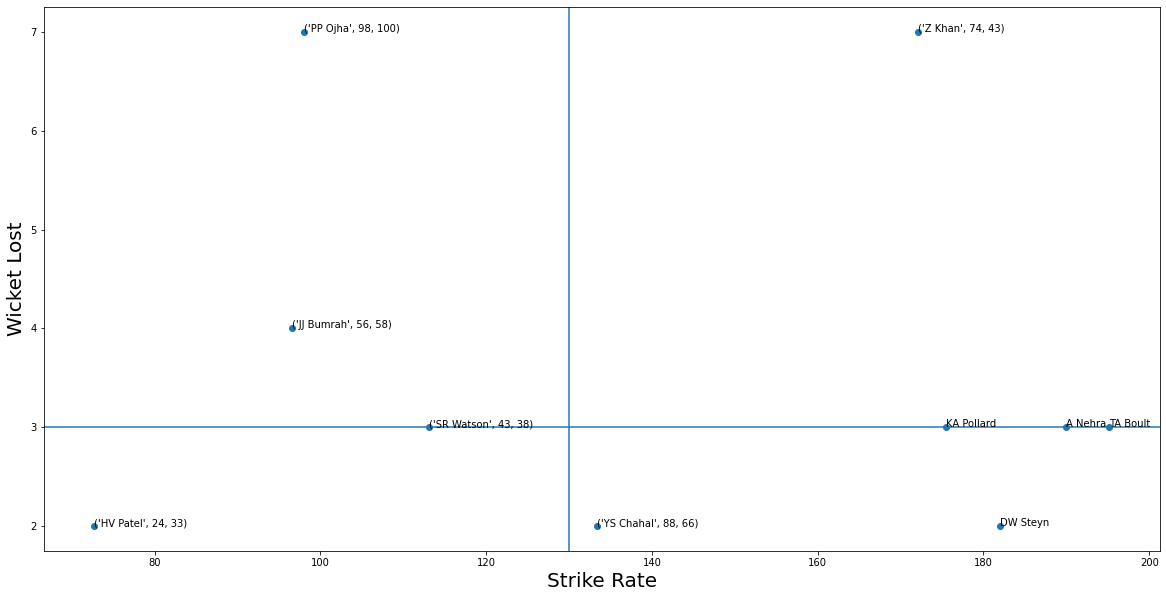

,bowler,runs_off_bat,ball,Strike_Rate,wicket_type
0,Z Khan,74,43,172.093023,7
1,PP Ojha,98,100,98.000000,7
2,JJ Bumrah,56,58,96.551724,4
3,A Nehra,76,40,190.000000,3
4,TA Boult,80,41,195.121951,3
5,SR Watson,43,38,113.157895,3
6,KA Pollard,100,57,175.438596,3
7,YS Chahal,88,66,133.333333,2
8,DW Steyn,111,61,181.967213,2
9,HV Patel,24,33,72.727273,2


In [243]:
MSD_against_bowler_runs_scored = pd.DataFrame(Dhoni_data.groupby('bowler')["runs_off_bat"].sum())
MSD_against_bowler_balls_faced = pd.DataFrame(Dhoni_data.groupby('bowler')["ball"].count())
MSD_against_bowler_SR = MSD_against_bowler_runs_scored.merge(MSD_against_bowler_balls_faced,on = "bowler")
MSD_against_bowler_SR['Strike_Rate'] = 100*(MSD_against_bowler_SR['runs_off_bat']/MSD_against_bowler_SR['ball'])
MSD_against_bowler_SR = MSD_against_bowler_SR[MSD_against_bowler_SR.ball >= 30]
MSD_against_bowler_wicket = pd.DataFrame(Dhoni_data.groupby('bowler')["wicket_type"].count())
MSD_against_bowler = MSD_against_bowler_SR.merge(MSD_against_bowler_wicket,on = "bowler")
MSD_full_IPL = MSD_against_bowler.sort_values(by=["wicket_type"], ascending=False)[0:10].reset_index()

plt.figure(figsize=(20,10))
plt.scatter(MSD_full_IPL.Strike_Rate,MSD_full_IPL.wicket_type)

#plt.title('Top 10 Bowler Wise Whole IPL Runs, Balls, Strike Rate and Wickets lost ',fontsize=20)
plt.xlabel('Strike Rate',fontsize=20)
plt.ylabel('Wicket Lost',fontsize=20)
plt.axvline(130)
plt.axhline(3)
for i in range(len(MSD_full_IPL)):
    if(MSD_full_IPL['wicket_type'][i] > 3):
        plt.text(MSD_full_IPL['Strike_Rate'][i],MSD_full_IPL['wicket_type'][i],(MSD_full_IPL['bowler'][i],MSD_full_IPL['runs_off_bat'][i],MSD_full_IPL['ball'][i]))
    elif(MSD_full_IPL['Strike_Rate'][i] < 150):
        plt.text(MSD_full_IPL['Strike_Rate'][i],MSD_full_IPL['wicket_type'][i],(MSD_full_IPL['bowler'][i],MSD_full_IPL['runs_off_bat'][i],MSD_full_IPL['ball'][i]))
    else:
        plt.text(MSD_full_IPL['Strike_Rate'][i],MSD_full_IPL['wicket_type'][i],MSD_full_IPL['bowler'][i])
plt.show()
MSD_full_IPL

# Top 10 Bowler Wise Last 3 IPL Details for  " MS Dhoni "

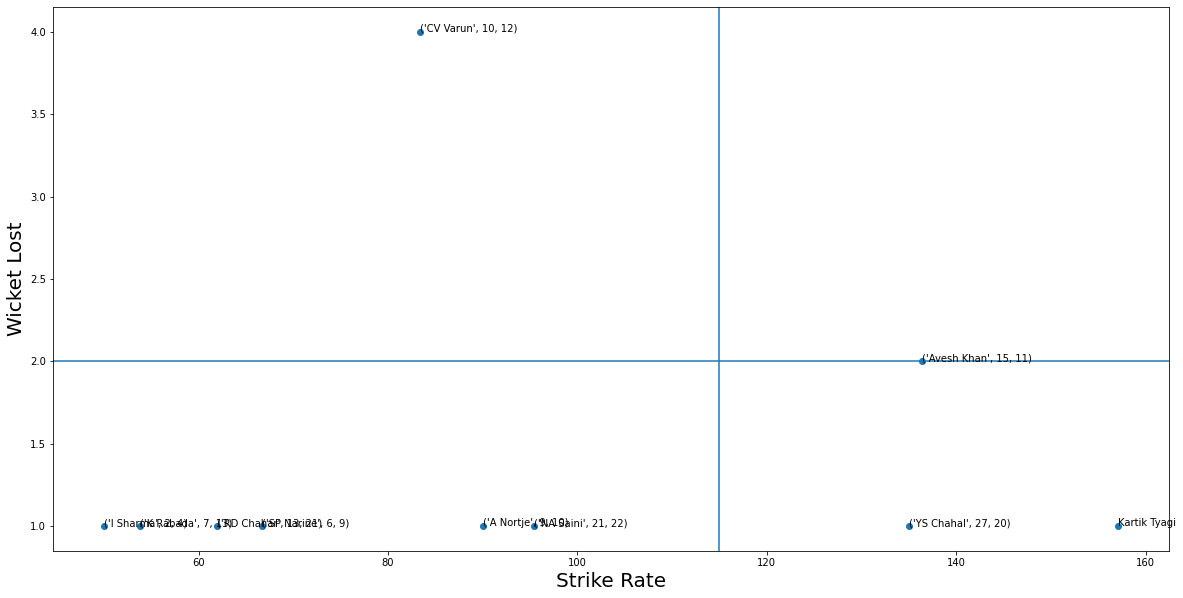

,bowler,runs_off_bat,ball,Strike_Rate,wicket_type
0,CV Varun,10,12,83.333333,4
1,Avesh Khan,15,11,136.363636,2
2,YS Chahal,27,20,135.000000,1
3,SP Narine,6,9,66.666667,1
4,Kartik Tyagi,11,7,157.142857,1
5,A Nortje,9,10,90.000000,1
6,NA Saini,21,22,95.454545,1
7,K Rabada,7,13,53.846154,1
8,RD Chahar,13,21,61.904762,1
9,I Sharma,2,4,50.000000,1


In [15]:
MSD_latest_data = Dhoni_data[(Dhoni_data['season']==2021) | (Dhoni_data['season']==2020) | (Dhoni_data['season']==2019)]

MSD_against_bowler_runs_scored = pd.DataFrame(MSD_latest_data.groupby('bowler')["runs_off_bat"].sum())
MSD_against_bowler_balls_faced = pd.DataFrame(MSD_latest_data.groupby('bowler')["ball"].count())
MSD_against_bowler_SR = MSD_against_bowler_runs_scored.merge(MSD_against_bowler_balls_faced,on = "bowler")
MSD_against_bowler_SR['Strike_Rate'] = 100*(MSD_against_bowler_SR['runs_off_bat']/MSD_against_bowler_SR['ball'])
MSD_against_bowler_wicket = pd.DataFrame(MSD_latest_data.groupby('bowler')["wicket_type"].count())
MSD_against_bowler = MSD_against_bowler_SR.merge(MSD_against_bowler_wicket,on = "bowler")
MSD_last3_IPL = MSD_against_bowler.sort_values(by=["wicket_type"], ascending=False)[0:10].reset_index()

plt.figure(figsize=(20,10))
plt.scatter(MSD_last3_IPL.Strike_Rate,MSD_last3_IPL.wicket_type)

plt.xlabel('Strike Rate',fontsize=20)
plt.ylabel('Wicket Lost',fontsize=20)
plt.axvline(115)
plt.axhline(2.0)


for i in range(len(MSD_last3_IPL)):
    if(MSD_last3_IPL['wicket_type'][i] > 3):
        plt.text(MSD_last3_IPL['Strike_Rate'][i],MSD_last3_IPL['wicket_type'][i],(MSD_last3_IPL['bowler'][i],MSD_last3_IPL['runs_off_bat'][i],MSD_last3_IPL['ball'][i]))
    elif(MSD_last3_IPL['Strike_Rate'][i] < 150):
        plt.text(MSD_last3_IPL['Strike_Rate'][i],MSD_last3_IPL['wicket_type'][i],(MSD_last3_IPL['bowler'][i],MSD_last3_IPL['runs_off_bat'][i],MSD_last3_IPL['ball'][i]))
    else:
        plt.text(MSD_last3_IPL['Strike_Rate'][i],MSD_last3_IPL['wicket_type'][i],MSD_last3_IPL['bowler'][i])
plt.show()
MSD_last3_IPL


# IPL Captaincy Records

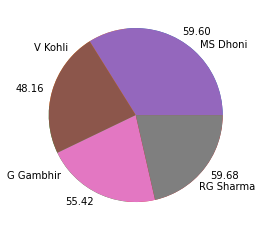

,Player,Span,Mat,Won,Lost,Tied,NR,%
0,MS Dhoni,2008-2021,204,121,82,0,1,59.60
2,V Kohli,2011-2021,140,64,69,3,4,48.16
4,G Gambhir,2009-2018,129,71,57,1,0,55.42
6,RG Sharma,2013-2021,129,75,50,4,0,59.68


In [245]:
records = pd.read_html('https://stats.espncricinfo.com/ci/engine/records/individual/most_matches_as_captain.html?id=117;type=trophy')
Captain_records = records[0][:8:2]

percent_win = Captain_records["%"]
No_Match = Captain_records["Mat"]
player_name = Captain_records["Player"]
plt.pie(percent_win, labels = (player_name))
plt.pie(No_Match, labels = (percent_win))

plt.show() 
Captain_records

# IPL WK Records

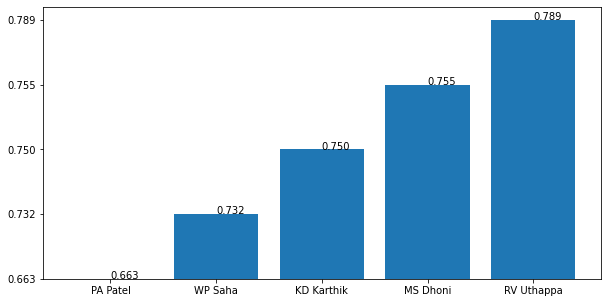

,index,Player,Span,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,8,PA Patel,2008-2019,139,122,81,65,16,4 (4ct 0st),0.663
1,6,WP Saha,2008-2021,133,112,82,62,20,4 (3ct 1st),0.732
2,2,KD Karthik,2008-2021,213,196,147,115,32,4 (4ct 0st),0.750
3,0,MS Dhoni,2008-2021,220,213,161,122,39,4 (4ct 0st),0.755
4,4,RV Uthappa,2008-2021,193,114,90,58,32,4 (2ct 2st),0.789


In [246]:
records = pd.read_html('https://stats.espncricinfo.com/ipl-hyd/engine/records/keeping/most_dismissals_career.html?ex_cid=ipl2021%3Agoogle_cpc%3Asearch%3Adsa_feed%3Amsn;gclid=CjwKCAjw9r-DBhBxEiwA9qYUpbHMiUAdEhD_9rHOYqAX2o_BLk7CuLizXBF_rLoM9yGAx8PwBYKAVRoCfo4QAvD_BwE;id=117;type=trophy')
wk_records = records[0][:10:2].sort_values(by=["Dis/Inn"], ascending=True).reset_index()

plt.figure(figsize=(10,5))
for i in range(len(wk_records)):
    plt.text(wk_records['Player'][i],wk_records['Dis/Inn'][i],wk_records['Dis/Inn'][i])

plt.bar(wk_records["Player"],wk_records["Dis/Inn"])
plt.show() 
wk_records

# IPL 2021 WK Records

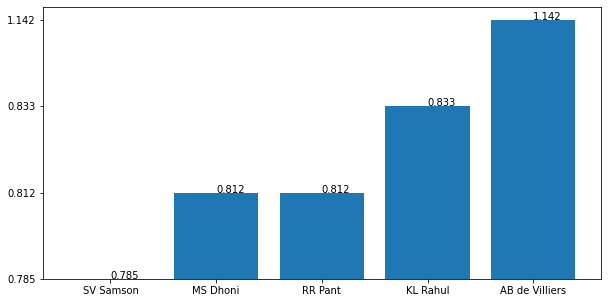

,index,Player,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,4,SV Samson,14,14,11,7,4,2 (2ct 0st),0.785
1,0,MS Dhoni,16,16,13,13,0,3 (3ct 0st),0.812
2,2,RR Pant,16,16,13,10,3,3 (3ct 0st),0.812
3,6,KL Rahul,13,12,10,10,0,2 (2ct 0st),0.833
4,8,AB de Villiers,15,7,8,8,0,3 (3ct 0st),1.142


In [247]:
records = pd.read_html('https://stats.espncricinfo.com/ci/engine/records/keeping/most_dismissals_career.html?id=13840;type=tournament')
wk_records = records[0][:10:2].sort_values(by=["Dis/Inn"], ascending=True).reset_index()

plt.figure(figsize=(10,5))
for i in range(len(wk_records)):
    plt.text(wk_records['Player'][i],wk_records['Dis/Inn'][i],wk_records['Dis/Inn'][i])
    
plt.bar(wk_records["Player"],wk_records["Dis/Inn"])
plt.show() 
wk_records


Conclusion : 